Loan Smart is a lending advisory firm. Based on their client’s characteristic and needed loan amount they
advise them on which Financial Institution to apply for loan at. So far their recommendations have been
based hunches business experience. Now they are trying to leverage power of data that they have collected so
far.

They want to check whether given their client’s characteristics , they can predict how much interest rates
they will be offered by various financial institution. They want to run with proof of concept for this idea.
They have given us data collected for one such financial institution.

What we need to do is to figure out whether using that data we can predict interest rate offered to client.  We have been given training data and testing data. Testing data doesnt have response values i.e. Interest Rates. We’ll eventually want to make prediction on this data where the response is unknown. Lets start with importing data

In [100]:
ld_train=read.csv("../input/loan-details/loan_data_train.csv",stringsAsFactors=F)

In [101]:
ld_test=read.csv("../input/loan-details/loan_data_test.csv",stringsAsFactors=F)

Using package dplyr let's have a glance on both train & test data sets. 

In [102]:
library(dplyr)

In [103]:
glimpse(ld_train)

Observations: 2,200
Variables: 15
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <chr> "25000", "19750", "2100", "28000", "24…
$ Amount.Funded.By.Investors     <chr> "25000", "19750", "2100", "28000", "17…
$ Interest.Rate                  <chr> "18.49%", "17.27%", "14.33%", "16.29%"…
$ Loan.Length                    <chr> "60 months", "60 months", "36 months",…
$ Loan.Purpose                   <chr> "debt_consolidation", "debt_consolidat…
$ Debt.To.Income.Ratio           <chr> "27.56%", "13.39%", "3.50%", "19.62%",…
$ State                          <chr> "VA", "NY", "LA", "NV", "OH", "OH", "C…
$ Home.Ownership                 <chr> "MORTGAGE", "MORTGAGE", "OWN", "MORTGA…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ FICO.Range                     <chr> "720-724", "710-714", "690-694", "710-…
$ Open.CREDIT.Lines              <chr> "11", "14", "13", "12", "6", "2", "5",…
$ Revolving.CREDIT

In [104]:
glimpse(ld_test)

Observations: 300
Variables: 14
$ ID                             <int> 20093, 62445, 65248, 81822, 57923, 337…
$ Amount.Requested               <int> 5000, 18000, 7200, 7200, 22000, 6000, …
$ Amount.Funded.By.Investors     <chr> "5000", "18000", "7200", "7200", "2200…
$ Loan.Length                    <chr> "60 months", "60 months", "60 months",…
$ Loan.Purpose                   <chr> "moving", "debt_consolidation", "debt_…
$ Debt.To.Income.Ratio           <chr> "12.59%", "4.93%", "25.16%", "17.27%",…
$ State                          <chr> "NY", "CA", "LA", "NY", "MI", "NJ", "C…
$ Home.Ownership                 <chr> "RENT", "RENT", "MORTGAGE", "MORTGAGE"…
$ Monthly.Income                 <dbl> 4416.67, 5258.50, 3750.00, 3416.67, 60…
$ FICO.Range                     <chr> "690-694", "710-714", "750-754", "790-…
$ Open.CREDIT.Lines              <chr> "13", "6", "13", "14", "9", ".", "11",…
$ Revolving.CREDIT.Balance       <int> 7686, 11596, 7283, 4838, 20181, 1442, …
$ Inquiries.in.the.L

**DATA **

Our train data consists of 2200 observations or rows & 15 Columns Whereas our test data has 300 rows & 14 columns . On a closer look we find out that Interest rate column is missing from the test data & our job is to predict the same. Also Variable names are self explanatory as to what they represent. 

**Data Preparation**

A big chunk of predictive modeling is preparing our data i.e. getting it ready for the modeling process.For that here we’ll combine our two datasets so that we do not need to prepare data separately for them. However before combining them, we’ll need to add response column (in this case Interest Rate) to test because number of columns need to be same for two datasets to stack vertically.

In [105]:
ld_test$Interest.Rate=NA

We will add another column name titled 'data' to both train & test datasets so that after cleaning its easier for us to recognize which is train & which is test data. After that we will combine them using function rbind. 

In [106]:
ld_train$data='train'
ld_test$data='test'

ld_all=rbind(ld_train,ld_test)

Let's start data preparation on 'ld_all' data set which we just created. Upon using glimpse function from dplyr package we can see that our ld_all data sets contains 2500 observations & 16 columns. So it means that both train & test data set has been successfully merged as shown below. 

In [107]:
glimpse(ld_all)

Observations: 2,500
Variables: 16
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <chr> "25000", "19750", "2100", "28000", "24…
$ Amount.Funded.By.Investors     <chr> "25000", "19750", "2100", "28000", "17…
$ Interest.Rate                  <chr> "18.49%", "17.27%", "14.33%", "16.29%"…
$ Loan.Length                    <chr> "60 months", "60 months", "36 months",…
$ Loan.Purpose                   <chr> "debt_consolidation", "debt_consolidat…
$ Debt.To.Income.Ratio           <chr> "27.56%", "13.39%", "3.50%", "19.62%",…
$ State                          <chr> "VA", "NY", "LA", "NV", "OH", "OH", "C…
$ Home.Ownership                 <chr> "MORTGAGE", "MORTGAGE", "OWN", "MORTGA…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ FICO.Range                     <chr> "720-724", "710-714", "690-694", "710-…
$ Open.CREDIT.Lines              <chr> "11", "14", "13", "12", "6", "2", "5",…
$ Revolving.CREDIT

Upon close inspecting data set ld_all we found out that there are certain columns like Interest.Rate,Debt.To.Income.Ratio have been imported as characters due to “%” sign . Similarily Open.Credit.Lines and some other supposedly numeric variables like Open.CREDIT.Lines, Amount.Requested, Amount.Funded.By.Investors,Revolving.CREDIT.Balance have been
converted to character because of some character value present possibly. Lets convert them to numbers first. We will be using global substitution or gsub function to replace "%" sign to an empty string & converting them to numeric using function as.numeric. Below line of codes demonstrate that. 

In [108]:
ld_all=ld_all %>%
mutate(Interest.Rate=as.numeric(gsub("%","",Interest.Rate)) ,
       Debt.To.Income.Ratio=as.numeric(gsub("%","",Debt.To.Income.Ratio)) ,
Open.CREDIT.Lines=as.numeric(Open.CREDIT.Lines) ,
Amount.Requested=as.numeric(Amount.Requested) ,
Amount.Funded.By.Investors=as.numeric(Amount.Funded.By.Investors),
Revolving.CREDIT.Balance=as.numeric(Revolving.CREDIT.Balance)
)

Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”Warning message:
“NAs introduced by coercion”

Now let's have a glance at our data using glimpse function. We will cross check if our columns has been changed to numeric or not 

In [109]:
glimpse(ld_all)

Observations: 2,500
Variables: 16
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <dbl> 25000, 19750, 2100, 28000, 24250, 5400…
$ Amount.Funded.By.Investors     <dbl> 25000.00, 19750.00, 2100.00, 28000.00,…
$ Interest.Rate                  <dbl> 18.49, 17.27, 14.33, 16.29, 12.23, 8.9…
$ Loan.Length                    <chr> "60 months", "60 months", "36 months",…
$ Loan.Purpose                   <chr> "debt_consolidation", "debt_consolidat…
$ Debt.To.Income.Ratio           <dbl> 27.56, 13.39, 3.50, 19.62, 23.79, 6.27…
$ State                          <chr> "VA", "NY", "LA", "NV", "OH", "OH", "C…
$ Home.Ownership                 <chr> "MORTGAGE", "MORTGAGE", "OWN", "MORTGA…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ FICO.Range                     <chr> "720-724", "710-714", "690-694", "710-…
$ Open.CREDIT.Lines              <dbl> 11, 14, 13, 12, 6, 2, 5, 11, 24, 7, 10…
$ Revolving.CREDIT

From above we can see that all our columns has been successfully changed to dbl. Further we will drop variable  'Amount.Funded.By.Investors' since one doesn't have this information at the time when they come with their loan application. 

In [110]:
ld_all = ld_all %>%
select(-Amount.Funded.By.Investors)

Let's see if it has been dropped or not using glimpse function. We will see that now our ld_all contain 15 variables or columns. 

In [111]:
glimpse(ld_all)

Observations: 2,500
Variables: 15
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <dbl> 25000, 19750, 2100, 28000, 24250, 5400…
$ Interest.Rate                  <dbl> 18.49, 17.27, 14.33, 16.29, 12.23, 8.9…
$ Loan.Length                    <chr> "60 months", "60 months", "36 months",…
$ Loan.Purpose                   <chr> "debt_consolidation", "debt_consolidat…
$ Debt.To.Income.Ratio           <dbl> 27.56, 13.39, 3.50, 19.62, 23.79, 6.27…
$ State                          <chr> "VA", "NY", "LA", "NV", "OH", "OH", "C…
$ Home.Ownership                 <chr> "MORTGAGE", "MORTGAGE", "OWN", "MORTGA…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ FICO.Range                     <chr> "720-724", "710-714", "690-694", "710-…
$ Open.CREDIT.Lines              <dbl> 11, 14, 13, 12, 6, 2, 5, 11, 24, 7, 10…
$ Revolving.CREDIT.Balance       <dbl> 15210, 19070, 893, 38194, 31061, 90, 8…
$ Inquiries.in.the

Let's see what we are going to do with our categorical variables. Lets consider FICO.Range first. Basically FICO is a credit score used by lenders including banks,credit card companies to make decisions about whether or not to offer us a credit. This variable has been imported as character here. We need to convert it to a numeric variable by assigning value as average of the range. Lets do that.

We will use substr function to extract from 1st to 3rd place & then create a column f1. Similarily using same substr we will retrieve from 5th till 7th place to create another column f2. After that we will take average of f1 & f2 & keep that values in column f. We will discard that FICO.Range column post that. Below line of codes shows the same.  

In [112]:
ld_all= ld_all %>%
mutate(f1=as.numeric(substr(FICO.Range,1,3)),
f2=as.numeric(substr(FICO.Range,5,7)),
fico=0.5*(f1+f2)
) %>%
select(-FICO.Range,-f1,-f2)

Let's see our ld_all data base so as to check if changes happened or not for FICO.Range

In [113]:
glimpse(ld_all)

Observations: 2,500
Variables: 15
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <dbl> 25000, 19750, 2100, 28000, 24250, 5400…
$ Interest.Rate                  <dbl> 18.49, 17.27, 14.33, 16.29, 12.23, 8.9…
$ Loan.Length                    <chr> "60 months", "60 months", "36 months",…
$ Loan.Purpose                   <chr> "debt_consolidation", "debt_consolidat…
$ Debt.To.Income.Ratio           <dbl> 27.56, 13.39, 3.50, 19.62, 23.79, 6.27…
$ State                          <chr> "VA", "NY", "LA", "NV", "OH", "OH", "C…
$ Home.Ownership                 <chr> "MORTGAGE", "MORTGAGE", "OWN", "MORTGA…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ Open.CREDIT.Lines              <dbl> 11, 14, 13, 12, 6, 2, 5, 11, 24, 7, 10…
$ Revolving.CREDIT.Balance       <dbl> 15210, 19070, 893, 38194, 31061, 90, 8…
$ Inquiries.in.the.Last.6.Months <int> 3, 3, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0,…
$ Employment.Lengt

We can see from above that a new column fico has been created which is nothing but average of those ranges. Also it has been converted to dbl. In a similar fashion we can convert employment length to numbers as well where I have used combination of ifelse & substr function to make necessary changes.

In [114]:
ld_all=ld_all %>%
mutate(el=ifelse(substr(Employment.Length,1,2)=="10",10,Employment.Length),
el=ifelse(substr(Employment.Length,1,1)=="<",0,el),
el=gsub("years","",el),
el=gsub("year","",el),
el=as.numeric(el)
) %>%
select(-Employment.Length)

Warning message:
“NAs introduced by coercion”

In [115]:
glimpse(ld_all)

Observations: 2,500
Variables: 15
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <dbl> 25000, 19750, 2100, 28000, 24250, 5400…
$ Interest.Rate                  <dbl> 18.49, 17.27, 14.33, 16.29, 12.23, 8.9…
$ Loan.Length                    <chr> "60 months", "60 months", "36 months",…
$ Loan.Purpose                   <chr> "debt_consolidation", "debt_consolidat…
$ Debt.To.Income.Ratio           <dbl> 27.56, 13.39, 3.50, 19.62, 23.79, 6.27…
$ State                          <chr> "VA", "NY", "LA", "NV", "OH", "OH", "C…
$ Home.Ownership                 <chr> "MORTGAGE", "MORTGAGE", "OWN", "MORTGA…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ Open.CREDIT.Lines              <dbl> 11, 14, 13, 12, 6, 2, 5, 11, 24, 7, 10…
$ Revolving.CREDIT.Balance       <dbl> 15210, 19070, 893, 38194, 31061, 90, 8…
$ Inquiries.in.the.Last.6.Months <int> 3, 3, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0,…
$ data            

Employment Length has been removed by el which we created just now. Let's look at our next categorical variable Loan.Purpose & find out frequency table of it. 

In [116]:
table(ld_all$Loan.Purpose)


               car        credit_card debt_consolidation        educational 
                50                444               1307                 15 
  home_improvement              house     major_purchase            medical 
               152                 20                101                 30 
            moving              other   renewable_energy     small_business 
                29                200                  4                 87 
          vacation            wedding 
                21                 39 

From above we realise that it has too many categories. There is no direct harm in considering to create dummy variables for n-1 for them. Here we are going to combine categories on the basis of average response , this will bring down number of categories and we can make dummies then. we’ll combine categories into new one which have similar reponse rate as per the table obtained below and make dummies for them. For example "major_purchase","medical","car" have similar impact on response i.e. Interest rate. Similarily it holds true for "vacation","wedding","home_improvement". 

In [117]:
round(tapply(ld_all$Interest.Rate,ld_all$Loan.Purpose,mean,na.rm=T))

car        credit_card debt_consolidation        educational 
                11                 13                 14                 10 
  home_improvement              house     major_purchase            medical 
                12                 14                 11                 11 
            moving              other   renewable_energy     small_business 
                14                 13                  8                 13 
          vacation            wedding 
                12                 12

In [118]:
ld_all=ld_all %>%
mutate(lp_10=as.numeric(Loan.Purpose=='educational'),
lp_11=as.numeric(Loan.Purpose %in% c("major_purchase","medical","car")),
lp_12=as.numeric(Loan.Purpose %in% c("vacation","wedding","home_improvement")),
lp_13=as.numeric(Loan.Purpose %in% c("other","small_business","credit_card")),
lp_14=as.numeric(Loan.Purpose %in% c("debt_consolidation","house","moving"))) %>%
select(-Loan.Purpose)

In [119]:
glimpse(ld_all)

Observations: 2,500
Variables: 19
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <dbl> 25000, 19750, 2100, 28000, 24250, 5400…
$ Interest.Rate                  <dbl> 18.49, 17.27, 14.33, 16.29, 12.23, 8.9…
$ Loan.Length                    <chr> "60 months", "60 months", "36 months",…
$ Debt.To.Income.Ratio           <dbl> 27.56, 13.39, 3.50, 19.62, 23.79, 6.27…
$ State                          <chr> "VA", "NY", "LA", "NV", "OH", "OH", "C…
$ Home.Ownership                 <chr> "MORTGAGE", "MORTGAGE", "OWN", "MORTGA…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ Open.CREDIT.Lines              <dbl> 11, 14, 13, 12, 6, 2, 5, 11, 24, 7, 10…
$ Revolving.CREDIT.Balance       <dbl> 15210, 19070, 893, 38194, 31061, 90, 8…
$ Inquiries.in.the.Last.6.Months <int> 3, 3, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0,…
$ data                           <chr> "train", "train", "train", "train", "t…
$ fico            

Now we are left with categorical variables like Loan.Length, State,Home.Ownership which needs to be converted to dummy variables. Instead of converting one by one Let's write a function for that. We will ignore categories with very low counts. 

In [120]:
CreateDummies=function(data,var,freq_cutoff=0){
t=table(data[,var])
t=t[t>freq_cutoff]
t=sort(t)
categories=names(t)[-1]
for( cat in categories){
name=paste(var,cat,sep="_")
name=gsub(" ","",name)
name=gsub("-","_",name)
name=gsub("\\?","Q",name)
name=gsub("<","LT_",name)
name=gsub("\\+","",name)
data[,name]=as.numeric(data[,var]==cat)
}
data[,var]=NULL
return(data)
}

Let me explain the function we created above. 

t=table(data[,var]) this bit creates a frequency table for the given categorical column. t here is now
simply a table which contains names as categories of the categorical variable and their frequency in the data.

t=t[t>freq_cutoff] this line of code removes those categories from the table which have frequencies below
the frequency cutoff. ( this is a subjective choice)

‘t=sort(t)’ this line simple sorts the remaining table in ascending order

categories=names(t)[-1] since we sorted the table in ascending manner in the previous line, first category
here has least count. In this line of code we are taking out the category names except the first one ( which
has least count), thus making n-1 dummies from the remaining categories.

name=paste(var,cat,sep="_") all the dummy vars that we intend to make, need to have some name. this
line of code creates that name by concatenating variable name with category name with an _.

name=gsub(" ","",name) subsequent lines like these using gsub are essentially cleaning up the name thats
all. Since we dont have any control over what the categories can be, we are removing special characters and
spaces in the code in an automated fashion.

data[,name]=as.numeric(data[,var]==cat) once we have a cleaned up name, this line creates the dummy
var for that particular category.

data[,var]=NULL once we are done creating dummies for the variable using for loop. Variable is removed
from the data in this line.

Next we will make dummy variables for remaining categorical variables (Loan.Length,State & Home.Ownership) using function CreateDummies. 

In [121]:
for(col in c("Loan.Length","State","Home.Ownership")){
ld_all=CreateDummies(ld_all,col,100)
}

Now let's have a look at ld_all

In [122]:
glimpse(ld_all)

Observations: 2,500
Variables: 23
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <dbl> 25000, 19750, 2100, 28000, 24250, 5400…
$ Interest.Rate                  <dbl> 18.49, 17.27, 14.33, 16.29, 12.23, 8.9…
$ Debt.To.Income.Ratio           <dbl> 27.56, 13.39, 3.50, 19.62, 23.79, 6.27…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ Open.CREDIT.Lines              <dbl> 11, 14, 13, 12, 6, 2, 5, 11, 24, 7, 10…
$ Revolving.CREDIT.Balance       <dbl> 15210, 19070, 893, 38194, 31061, 90, 8…
$ Inquiries.in.the.Last.6.Months <int> 3, 3, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0,…
$ data                           <chr> "train", "train", "train", "train", "t…
$ fico                           <dbl> 722, 712, 692, 712, 732, 787, 667, 737…
$ el                             <dbl> 5, 4, 0, 10, 10, NA, 2, 0, NA, NA, 10,…
$ lp_10                          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ lp_11           

We can see from above that number of variables has been increased to 23 from 19 due to creation of dummy variables for categorical columns mentioned above. 

**Missing Values **

Let'see if there are any missing values in the data using lapply function which will give output in list format. 

In [123]:
lapply(ld_all,function(x) sum(is.na(x)))

$ID
[1] 1

$Amount.Requested
[1] 5

$Interest.Rate
[1] 300

$Debt.To.Income.Ratio
[1] 1

$Monthly.Income
[1] 3

$Open.CREDIT.Lines
[1] 9

$Revolving.CREDIT.Balance
[1] 5

$Inquiries.in.the.Last.6.Months
[1] 3

$data
[1] 0

$fico
[1] 0

$el
[1] 80

$lp_10
[1] 1

$lp_11
[1] 0

$lp_12
[1] 0

$lp_13
[1] 0

$lp_14
[1] 0

$Loan.Length_36months
[1] 1

$State_FL
[1] 1

$State_TX
[1] 1

$State_NY
[1] 1

$State_CA
[1] 1

$Home.Ownership_RENT
[1] 1

$Home.Ownership_MORTGAGE
[1] 1

It turns out that there are many missing values in our data 'ld_all' which can be seen above. It doesnt make sense to keep an observation with a missing ID, we’ll filter that.

In [124]:
ld_all=ld_all[!(is.na(ld_all$ID)),]

Lets impute the missing values for remaining columns with mean of train data.We will run a for loop as shown below.  

In [125]:
for(col in names(ld_all)){
if(sum(is.na(ld_all[,col]))>0 & !(col %in% c("ID","data","Interest.Rate"))){
ld_all[is.na(ld_all[,col]),col]=mean(ld_all[ld_all$data=="train",col],na.rm=T)
}
}

Let's cross check if there are any missing values now. 

In [126]:
ld_all=ld_all[!(is.na(ld_all$ID)),]

Now we are done with preparing data , lets separate the data.

In [127]:
ld_train=ld_all %>% filter(data=='train') %>% select(-data)
ld_test=ld_all %>% filter(data=='test') %>% select(-data,-Interest.Rate)

In [128]:
glimpse(ld_train)

Observations: 2,199
Variables: 22
$ ID                             <int> 79542, 75473, 67265, 80167, 17240, 327…
$ Amount.Requested               <dbl> 25000, 19750, 2100, 28000, 24250, 5400…
$ Interest.Rate                  <dbl> 18.49, 17.27, 14.33, 16.29, 12.23, 8.9…
$ Debt.To.Income.Ratio           <dbl> 27.56, 13.39, 3.50, 19.62, 23.79, 6.27…
$ Monthly.Income                 <dbl> 8606.56, 6737.50, 1000.00, 7083.33, 58…
$ Open.CREDIT.Lines              <dbl> 11, 14, 13, 12, 6, 2, 5, 11, 24, 7, 10…
$ Revolving.CREDIT.Balance       <dbl> 15210, 19070, 893, 38194, 31061, 90, 8…
$ Inquiries.in.the.Last.6.Months <dbl> 3, 3, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0,…
$ fico                           <dbl> 722, 712, 692, 712, 732, 787, 667, 737…
$ el                             <dbl> 5.000000, 4.000000, 0.000000, 10.00000…
$ lp_10                          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ lp_11                          <dbl> 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ lp_12           

In [129]:
glimpse(ld_test)

Observations: 300
Variables: 21
$ ID                             <int> 20093, 62445, 65248, 81822, 57923, 337…
$ Amount.Requested               <dbl> 5000, 18000, 7200, 7200, 22000, 6000, …
$ Debt.To.Income.Ratio           <dbl> 12.59, 4.93, 25.16, 17.27, 18.28, 2.52…
$ Monthly.Income                 <dbl> 4416.67, 5258.50, 3750.00, 3416.67, 60…
$ Open.CREDIT.Lines              <dbl> 13.00000, 6.00000, 13.00000, 14.00000,…
$ Revolving.CREDIT.Balance       <dbl> 7686, 11596, 7283, 4838, 20181, 1442, …
$ Inquiries.in.the.Last.6.Months <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,…
$ fico                           <dbl> 692, 712, 752, 792, 722, 752, 692, 717…
$ el                             <dbl> 0.000000, 10.000000, 6.000000, 10.0000…
$ lp_10                          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ lp_11                          <dbl> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,…
$ lp_12                          <dbl> 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,…
$ lp_13             

Now my train data contains 22 variables  & test data has 21 variables or columns. Let's break our data into 2 parts. We will build the model on one part & check its performance on another. We will break ld_train data in ratio 70:30 using sample function as shown below.   

In [131]:
set.seed(2)
s=sample(1:nrow(ld_train),0.7*nrow(ld_train))
ld_train1=ld_train[s,]
ld_train2=ld_train[-s,]

**Data Modelling**

We’ll be using function lm for building our linear regression model.
First argument to this function is the modeling equation which we are trying to model. second argument is
the dataset.

Lets begin. Our response here is Interest.Rate and rest of the variables in ld_train are our predictor
variable. Before we begin we will make sure that none of the variables in the dataset which we are going to use for
modeling are of character type. Let's glimpse that as well. 

In [132]:
glimpse(ld_train1)

Observations: 1,539
Variables: 22
$ ID                             <int> 34331, 92046, 8382, 47097, 62900, 2947…
$ Amount.Requested               <dbl> 3300, 32000, 6250, 7200, 6000, 6000, 2…
$ Interest.Rate                  <dbl> 11.71, 17.27, 10.25, 7.90, 6.03, 11.89…
$ Debt.To.Income.Ratio           <dbl> 4.16, 15.61, 18.04, 12.13, 5.65, 19.38…
$ Monthly.Income                 <dbl> 3730.00, 9250.00, 2400.00, 2333.33, 70…
$ Open.CREDIT.Lines              <dbl> 7, 15, 5, 7, 15, 6, 13, 13, 9, 16, 13,…
$ Revolving.CREDIT.Balance       <dbl> 3675, 32566, 14863, 6262, 5747, 42987,…
$ Inquiries.in.the.Last.6.Months <dbl> 1, 1, 0, 1, 0, 1, 1, 0, 0, 3, 0, 2, 0,…
$ fico                           <dbl> 702, 702, 722, 727, 752, 727, 667, 722…
$ el                             <dbl> 1.000000, 2.000000, 10.000000, 2.00000…
$ lp_10                          <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ lp_11                          <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ lp_12           

We can see that all the variables in data are numeric , lets start now. It doesnt make sense to include
variable ID in the modelling process. Its just a id number for the transactions which should be ignored.

In [133]:
fit=lm(Interest.Rate~. -ID,data=ld_train1)

Before we start looking at model summary and p-value for the variables , we need to drop variables from
the model which have high VIF. Ideally we are checking multi collinearity in our data which means predictors are correlated with other predictors as it is linearly dependent on few other predictor variables. That redundancy need to be removed. 

For looking at VIF values for the variables , we’ll use function vif from package car.

In [134]:
library(car)
vif(fit)

Loading required package: carData

Attaching package: ‘car’

The following object is masked from ‘package:dplyr’:

    recode



Amount.Requested           Debt.To.Income.Ratio 
                      1.777267                       1.390000 
                Monthly.Income              Open.CREDIT.Lines 
                      1.684595                       1.358993 
      Revolving.CREDIT.Balance Inquiries.in.the.Last.6.Months 
                      1.322998                       1.049780 
                          fico                             el 
                      1.167498                       1.103588 
                         lp_10                          lp_11 
                      3.517704                      26.712734 
                         lp_12                          lp_13 
                     32.261817                      81.984659 
                         lp_14           Loan.Length_36months 
                     97.509584                       1.278274 
                      State_FL                       State_TX 
                      1.055457                       1.058533 
                      State_NY                       State_CA 
                      1.109780                       1.110674 
           Home.Ownership_RENT        Home.Ownership_MORTGAGE 
                      3.623192                       3.686325

It will be easier to identify high VIF vars if we sort the results and say look at top 3 only as shown below. 

In [135]:
sort(vif(fit),decreasing = T)[1:3]

lp_14    lp_13    lp_12 
97.50958 81.98466 32.26182

We’ll drop highest vif var one by one and run the model again. First we will drop lp_14 variable as shown below. 

In [136]:
fit=lm(Interest.Rate~. -ID - lp_14,data=ld_train)

Again we will sort 

In [137]:
sort(vif(fit),decreasing = T)[1:3]

Home.Ownership_MORTGAGE     Home.Ownership_RENT        Amount.Requested 
               3.735010                3.650675                1.587393

From above it is clear that all VIF values are under control i.e below 5.Now we look at the model summary , specifically p-values asscociated with the variables. We can drop variables with high p-values [ >0.05] one by one or we can use step function which drops vars based on AIC score one by one. 

In [138]:
fit=step(fit)

Start:  AIC=3203.34
Interest.Rate ~ (ID + Amount.Requested + Debt.To.Income.Ratio + 
    Monthly.Income + Open.CREDIT.Lines + Revolving.CREDIT.Balance + 
    Inquiries.in.the.Last.6.Months + fico + el + lp_10 + lp_11 + 
    lp_12 + lp_13 + lp_14 + Loan.Length_36months + State_FL + 
    State_TX + State_NY + State_CA + Home.Ownership_RENT + Home.Ownership_MORTGAGE) - 
    ID - lp_14

                                 Df Sum of Sq     RSS    AIC
- lp_12                           1       0.0  9267.7 3201.3
- State_NY                        1       0.2  9267.9 3201.4
- State_CA                        1       0.4  9268.1 3201.4
- Debt.To.Income.Ratio            1       0.8  9268.5 3201.5
- State_FL                        1       1.3  9269.0 3201.6
- lp_11                           1       2.2  9269.9 3201.9
- lp_10                           1       2.6  9270.3 3202.0
- Home.Ownership_RENT             1       3.7  9271.5 3202.2
- Revolving.CREDIT.Balance        1       5.6  9273.3 3202.7
- el

Let's check model summary to see what all variable remain in the model.

In [139]:
summary(fit)


Call:
lm(formula = Interest.Rate ~ Amount.Requested + Monthly.Income + 
    Open.CREDIT.Lines + Inquiries.in.the.Last.6.Months + fico + 
    Loan.Length_36months + State_TX + Home.Ownership_MORTGAGE, 
    data = ld_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5280 -1.3681 -0.2007  1.2432 10.0654 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.466e+01  9.250e-01  80.718  < 2e-16 ***
Amount.Requested                1.509e-04  6.764e-06  22.310  < 2e-16 ***
Monthly.Income                 -2.275e-05  1.203e-05  -1.892 0.058675 .  
Open.CREDIT.Lines              -4.414e-02  1.024e-02  -4.311  1.7e-05 ***
Inquiries.in.the.Last.6.Months  3.504e-01  3.664e-02   9.564  < 2e-16 ***
fico                           -8.562e-02  1.287e-03 -66.547  < 2e-16 ***
Loan.Length_36months           -3.233e+00  1.180e-01 -27.388  < 2e-16 ***
State_TX                        6.253e-01  1.769e-01   3.536 0.000415 ***
Ho

It turns out there is still one var (Monthly.Income) for which p-value is higher than .05 . We can manually include all other vars of the model or extract the exact formula using formula function.

In [140]:
formula(fit)

Interest.Rate ~ Amount.Requested + Monthly.Income + Open.CREDIT.Lines + 
    Inquiries.in.the.Last.6.Months + fico + Loan.Length_36months + 
    State_TX + Home.Ownership_MORTGAGE

We can drop variable Monthly.Income from this.

In [141]:
fit=lm(Interest.Rate ~ Amount.Requested + Open.CREDIT.Lines +
Inquiries.in.the.Last.6.Months + fico + Loan.Length_36months +
State_TX + Home.Ownership_MORTGAGE,data=ld_train1)
summary(fit)


Call:
lm(formula = Interest.Rate ~ Amount.Requested + Open.CREDIT.Lines + 
    Inquiries.in.the.Last.6.Months + fico + Loan.Length_36months + 
    State_TX + Home.Ownership_MORTGAGE, data = ld_train1)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6999 -1.3742 -0.2214  1.1553 10.1446 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.474e+01  1.104e+00  67.690  < 2e-16 ***
Amount.Requested                1.489e-04  7.630e-06  19.520  < 2e-16 ***
Open.CREDIT.Lines              -4.902e-02  1.224e-02  -4.006 6.48e-05 ***
Inquiries.in.the.Last.6.Months  3.216e-01  4.180e-02   7.696 2.51e-14 ***
fico                           -8.583e-02  1.544e-03 -55.595  < 2e-16 ***
Loan.Length_36months           -3.192e+00  1.412e-01 -22.605  < 2e-16 ***
State_TX                        5.441e-01  2.084e-01   2.611  0.00912 ** 
Home.Ownership_MORTGAGE        -2.621e-01  1.099e-01  -2.385  0.01719 *  
---
Signif. codes:  0 ‘

This is our final model with all variables being significant( p-value < 0.05). WE can also see Adj
R-squared value for the model is 0.7564 which means that this models explains 75.64% variation in our
response. This answers how good is our model is. We can check this visually by plotting predicted values and the original response using ggplot package as shown below. 

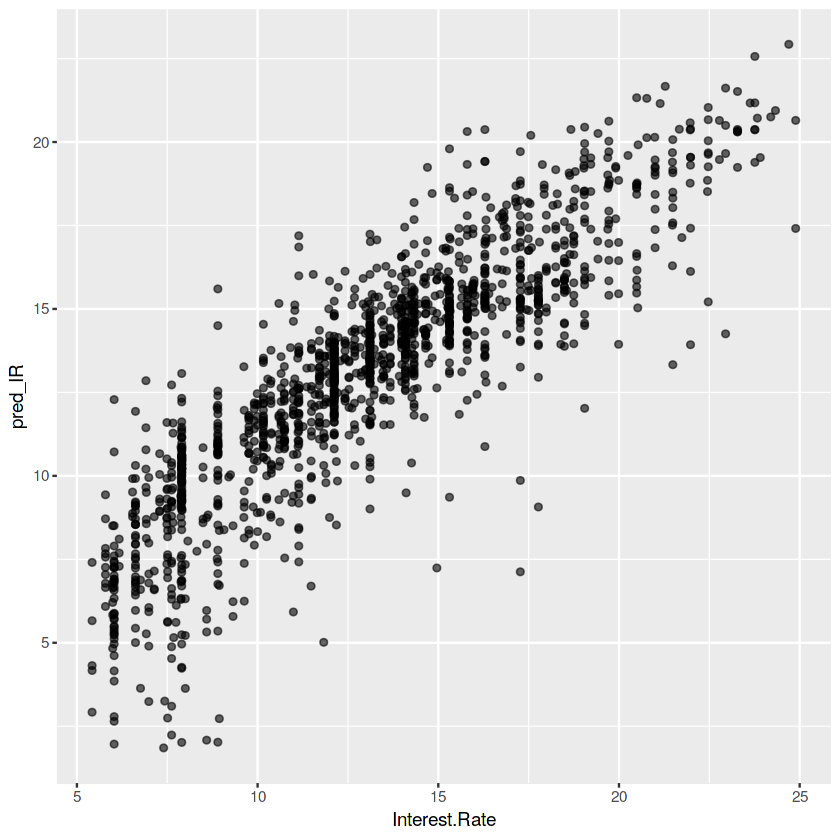

In [142]:
library(ggplot2)
ld_train1 %>%
mutate(pred_IR=predict(fit,newdata=ld_train1)) %>%
ggplot(aes(x=Interest.Rate,y=pred_IR))+geom_point(alpha=0.6)

The graph above shows that there's good overlap. Lets look at root mean square error (rmse) value for validation data. We see that model performance [RMSE] on validation data comes out to be 2.06.

In [143]:
rmse= mean((ld_train2$Interest.Rate-predict(fit,newdata=ld_train2))**2) %>% sqrt()

rmse

[1] 2.065264

**Final Model**

Now that we know about the tentative performance of the model , we’ll go ahead and build the model on the
entire training data and use that model to predict result on the test/production data.

In [144]:
fit.final=fit=lm(Interest.Rate ~ .-ID,data=ld_train)
fit.final=step(fit.final)

Start:  AIC=3204.82
Interest.Rate ~ (ID + Amount.Requested + Debt.To.Income.Ratio + 
    Monthly.Income + Open.CREDIT.Lines + Revolving.CREDIT.Balance + 
    Inquiries.in.the.Last.6.Months + fico + el + lp_10 + lp_11 + 
    lp_12 + lp_13 + lp_14 + Loan.Length_36months + State_FL + 
    State_TX + State_NY + State_CA + Home.Ownership_RENT + Home.Ownership_MORTGAGE) - 
    ID

                                 Df Sum of Sq     RSS    AIC
- State_NY                        1       0.2  9265.7 3202.9
- lp_10                           1       0.3  9265.8 3202.9
- State_CA                        1       0.3  9265.9 3202.9
- Debt.To.Income.Ratio            1       0.8  9266.3 3203.0
- State_FL                        1       1.3  9266.9 3203.1
- lp_13                           1       1.4  9266.9 3203.2
- lp_11                           1       1.4  9267.0 3203.2
- lp_12                           1       2.2  9267.7 3203.3
- lp_14                           1       2.2  9267.7 3203.3
- Home.Owner

In [145]:
summary(fit.final)


Call:
lm(formula = Interest.Rate ~ Amount.Requested + Monthly.Income + 
    Open.CREDIT.Lines + Inquiries.in.the.Last.6.Months + fico + 
    Loan.Length_36months + State_TX + Home.Ownership_MORTGAGE, 
    data = ld_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5280 -1.3681 -0.2007  1.2432 10.0654 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.466e+01  9.250e-01  80.718  < 2e-16 ***
Amount.Requested                1.509e-04  6.764e-06  22.310  < 2e-16 ***
Monthly.Income                 -2.275e-05  1.203e-05  -1.892 0.058675 .  
Open.CREDIT.Lines              -4.414e-02  1.024e-02  -4.311  1.7e-05 ***
Inquiries.in.the.Last.6.Months  3.504e-01  3.664e-02   9.564  < 2e-16 ***
fico                           -8.562e-02  1.287e-03 -66.547  < 2e-16 ***
Loan.Length_36months           -3.233e+00  1.180e-01 -27.388  < 2e-16 ***
State_TX                        6.253e-01  1.769e-01   3.536 0.000415 ***
Ho

Again we will drop Monthly Income from this since it has high value (>0.05)

In [147]:
formula(fit.final)

Interest.Rate ~ Amount.Requested + Monthly.Income + Open.CREDIT.Lines + 
    Inquiries.in.the.Last.6.Months + fico + Loan.Length_36months + 
    State_TX + Home.Ownership_MORTGAGE

In [150]:
fit.final=lm(Interest.Rate ~ Amount.Requested  + Open.CREDIT.Lines + 
    Inquiries.in.the.Last.6.Months + fico + Loan.Length_36months + 
    State_TX + Home.Ownership_MORTGAGE,data=ld_train)

In [151]:
summary(fit.final)


Call:
lm(formula = Interest.Rate ~ Amount.Requested + Open.CREDIT.Lines + 
    Inquiries.in.the.Last.6.Months + fico + Loan.Length_36months + 
    State_TX + Home.Ownership_MORTGAGE, data = ld_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6561 -1.3809 -0.1988  1.2274 10.1133 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     7.479e+01  9.230e-01  81.029  < 2e-16 ***
Amount.Requested                1.464e-04  6.330e-06  23.124  < 2e-16 ***
Open.CREDIT.Lines              -4.582e-02  1.021e-02  -4.490 7.49e-06 ***
Inquiries.in.the.Last.6.Months  3.477e-01  3.663e-02   9.492  < 2e-16 ***
fico                           -8.584e-02  1.282e-03 -66.941  < 2e-16 ***
Loan.Length_36months           -3.257e+00  1.175e-01 -27.727  < 2e-16 ***
State_TX                        6.335e-01  1.769e-01   3.581 0.000349 ***
Home.Ownership_MORTGAGE        -2.873e-01  9.148e-02  -3.141 0.001706 ** 
---
Signif. codes:  0 ‘*

We can use this final model (i.e. fit.final) to make prediction on our test data ld_test. We will use predict function to achieve this. The result has been kept in object name pred.IR which contains nothing but 300 numbers of Interest rates for the test data given to us.   

In [153]:
pred.IR=predict(fit.final,newdata=ld_test)

pred.IR

1         2         3         4         5         6         7         8 
15.529527 16.036572 10.414071  3.678144 15.338936  7.115400 16.036484 10.365000 
        9        10        11        12        13        14        15        16 
14.729797 12.231716  9.912909 15.255405 11.533947 13.059738 13.773201 18.334377 
       17        18        19        20        21        22        23        24 
10.142810 14.817529 13.853953 14.225087 22.062067 17.848250 12.451277 14.764082 
       25        26        27        28        29        30        31        32 
 9.703217 10.813061 13.046293 19.682167 12.251356 17.352119 15.384547 15.772939 
       33        34        35        36        37        38        39        40 
12.527588 14.547335 13.461358 14.216303 19.352198 11.666823 12.136451 16.950284 
       41        42        43        44        45        46        47        48 
14.162852 11.428105 14.539212 13.248402 15.838397 16.900376 15.374790 16.677570 
       49        50        51        52        53        54        55        56 
16.973138 10.873448 13.725674 19.639348  9.936492 19.644029 15.628402 14.835925 
       57        58        59        60        61        62        63        64 
17.888358 14.947161 10.582584 14.784445 13.314753 16.858573  8.915165 14.608420 
       65        66        67        68        69        70        71        72 
10.571491 11.535710 12.888539 15.231680 12.126615 14.585097 14.612482 17.483083 
       73        74        75        76        77        78        79        80 
20.429160 19.731520 13.259798 17.016834 11.049411 10.377189 16.900056  6.935882 
       81        82        83        84        85        86        87        88 
16.116104 10.541740  9.553531 13.135598 13.847684  9.835217  8.766872 14.478606 
       89        90        91        92        93        94        95        96 
 8.868494 11.253276 12.172865 17.038836 13.695991 17.997605 13.930557 10.655643 
       97        98        99       100       101       102       103       104 
 9.558116 17.166630 16.717120 13.865339 15.704980 13.682415 14.709222 14.985425 
      105       106       107       108       109       110       111       112 
13.206925 11.992196  8.612981 12.041692 10.952386 13.491741 12.325208 20.710824 
      113       114       115       116       117       118       119       120 
 7.964209 17.004401 14.915426  6.468868 13.582477 14.464815 15.071070  9.738141 
      121       122       123       124       125       126       127       128 
16.099199 14.183923  9.010761 13.051229 16.327855 15.918463  8.566976 18.927673 
      129       130       131       132       133       134       135       136 
 2.914702 12.482687 13.988237 13.182651  9.345007 14.197499 18.746718 14.193597 
      137       138       139       140       141       142       143       144 
15.704148 13.561696 12.661760  9.624594 14.421115 14.270251 11.910739 11.815391 
      145       146       147       148       149       150       151       152 
11.693490 17.138829 11.963344 10.021433  7.992522 10.113401 11.387779 13.754743 
      153       154       155       156       157       158       159       160 
10.437708  7.107811 14.302521 11.805640 11.380360  8.338467 14.756036 14.785263 
      161       162       163       164       165       166       167       168 
14.301839  7.504706 14.946117 18.426786 15.352606 16.120022 14.616774 10.147345 
      169       170       171       172       173       174       175       176 
13.787123 16.806338 14.542278 13.027918  6.855976 13.716765 10.448483 10.345574 
      177       178       179       180       181       182       183       184 
11.239188  8.462988  9.537391 11.326486 13.456146 14.564202 10.340515 13.954314 
      185       186       187       188       189       190       191       192 
10.459049 13.588354  7.215636 17.704298 13.908974  9.600414  7.310372 11.184030 
      193       194       195       196       197       198       199       200 
15.927143 15.498351 15.035076 17.451170

**Interpreting Model Coefficients**

1. For high amount requested , interest rates are going to be higher as well
2. If someone has been applying for loan at too many places ( results in high number of inquiries), they’ll get higher interest rates
3.  Where as if anyone has high fico score (more credit worthy) , their interest rates are going to be lower.
4.  If someone is applying for a loan for 36 months , their interest will be lower by almost 3.5% in comparisons to 60 months loan